# Analyze A/B Test Results 


- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. Here, an attempt was made to understand the results of an A/B test run by an e-commerce website and to help understand if it will be benificial to:

- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

###  1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>





**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [8]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [9]:
df.shape

(294478, 5)

There are **294478** rows in this dataset.

**c.** The number of unique users in the dataset.

In [10]:
df.user_id.nunique()

290584

There are **290584** unique users in the dataset.

**d.** The proportion of users converted.

In [11]:
df.query('converted == 1').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

**12.104 %** of users converted according to the given dataset.

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [12]:
df.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page == "new_page" )').user_id.nunique()

3893

**1965** is the number of times when a "group" is treatment but "landing_page" is not a new_page.

**f.** Do any of the rows have missing values?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Thus, there are no rows with missing values.

###  1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  




**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" and landing_page == "new_page")')

In [15]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Thus, the new dataframe df2 is in accordance with our requirements.

### 1.3  


**a.** How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.nunique()

290584

There are **290584** unique user_id's in df2

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

The user_id of the repeated in df2 is **773192**.

**c.** Display the rows for the duplicate **user_id**? 

In [18]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [19]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. df
df2 = df2.drop(2893)
# Check again if the row with a duplicate user_id is deleted or not


In [20]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


Thus, the duplicate user_id was deleted.

### 1.4  

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [21]:
df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()

0.11959708724499628

The probablity of an individual converting regardless of the page they receive is **11.96 %**

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
crt_conv_rate = df.query('group == "control" and converted == 1').user_id.nunique()/df.query('group == "control"').user_id.nunique()
crt_conv_rate

0.12109853278155888

Given that an individual was in the control group, the probability they converted is **12.11 %**

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
trt_conv_rate = df.query('group == "treatment" and converted == 1').user_id.nunique()/df.query('group == "treatment"').user_id.nunique()
trt_conv_rate

0.11957562002679718

Given that an individual was in the treatment group, the probability they converted **11.96 %**

In [24]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = trt_conv_rate - crt_conv_rate 
obs_diff

-0.0015229127547616989

**d.** What is the probability that an individual received the new page?

In [25]:
df2.query('landing_page == "new_page"').user_id.nunique()/df2.user_id.nunique()

0.5000619442226688

 The probability that an individual received the new page is : **50 %**

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**Answer:**
Conversion rate for the treatment group which viewed the new page is 11.96 % and conversion rate for the control group which viewed the old page is 12.11 %.
This suggests that control group has better conversion rate and leads to better conversions but not by much.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, we could run a hypothesis test continuously as long as we observe the events. 

However, then the hard questions would be: 
- Do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do we run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### 2.1
For now, consider we need to make the decision just based on all the data provided.  

> Recall that we just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (1.4.c). 

If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

We can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Answer:**   
>
>$H_0$:  $p_{new}$ $<=$ $p_{old}$    
>
>$H_1$:  $p_{new}$ $>$ $p_{old}$ 

###  2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, we will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 





**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [26]:
p_new = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
p_new

0.11959708724499628

**conversion rate** when the user visited new webpage under the null hypothesis is given by : 11.96%

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [27]:
p_old = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
p_old

0.11959708724499628

**conversion rate** when the user visited old webpage under the null hypothesis is given by : 11.96%

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [28]:
n_new = df2.query("group == 'treatment'").user_id.nunique()
n_new

145310

 Number of individuals in the treatment group: **145310**.

**d.** What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2.query("group == 'control'").user_id.nunique()
n_old

145274

Number of individuals in the control group: **145274**

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [30]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1-p_new)])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [31]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1-p_old)])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [32]:
new_page_converted.mean() - old_page_converted.mean()

0.00043134833693699026

The difference in the "converted" probability for simulated samples is approximately **0**. As both had the same conversion rate under the null hypothesis.


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [36]:
# Sampling distribution 
p_diffs = []

new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure we fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



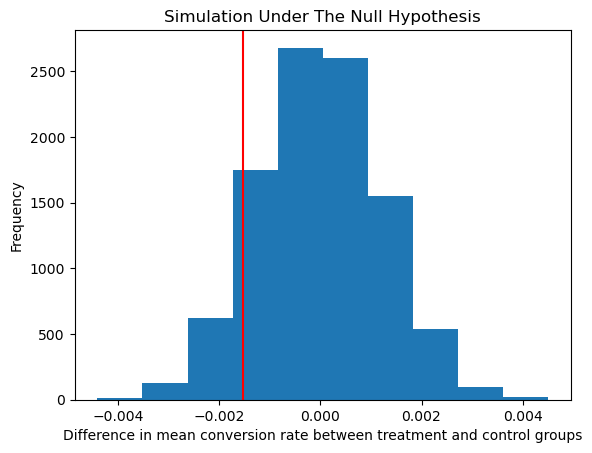

In [37]:
plt.hist(p_diffs);
plt.axvline(obs_diff,color = 'red');
plt.title('Simulation Under The Null Hypothesis');
plt.xlabel('Difference in mean conversion rate between treatment and control groups');
plt.ylabel('Frequency');


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [38]:
p_diffs = np.array(p_diffs)

In [39]:
len(p_diffs[p_diffs > obs_diff])/len(p_diffs)

0.8922

**0.8922** proportion of p_diffs are greater than the actual difference observed.

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>The value computed in j is called the **p-value**.
>
>The p-value is 0.8912, which signifies that we fail to reject the null hypothesis (p-value is greater than Type 1 error rate threshold) .This indicates that the old page is better than new page in terms of conversion rate.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [40]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page == "old_page" and converted == 1'))

# number of conversions with the new_page
convert_new = len(df2.query('landing_page == "new_page" and converted == 1'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))

**m.** Now use `sm.stats.proportions_ztest()` to compute the test statistic and p-value. 
The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that we have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.






In [41]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)


1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>**Answer**<br>
>In the previous question we can see that $Z_{score}$ > $Z_{\alpha}$ for left tailed test. This indicates that we fail to reject the null.<br>
>The finding of the z-test are in correlation with what was found in **j.** and **k.**


<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, we will see that the result we achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Answer**<br>
>We will use Logistic Regression in this case as the response variable is categorical with only two possible values.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, we first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [42]:
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df['group'])
df2.drop(['control'],axis=1,inplace=True)

In [43]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [44]:
import statsmodels.api as sm
logitmod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results = logitmod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:               8.077e-06
Time:                        22:37:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value we found in **Part II**?<br><br>  



>**Answer:**<br>
>
>The p-value for both the cases (Part-II and Part-III) is different because in both the cases the hypotheses under consideration is different.<br>
>
> In part II the hypothesis setup is as follows:<br>
>
>$H_0$:  $p_{new}$ $<=$ $p_{old}$ <br>
>$H_1$:  $p_{new}$ $>$ $p_{old}$ <br>
>
>Here we a are seeing if conversion rate for new website is better that the new version or not.
>
> In part-III, the hypothesis setup is as follows:<br>
>
>$H_0$:  $p_{new}$ - $p_{old}$ $=$ 0  <br>
>$H_1$:  $p_{new}$ - $p_{old}$ $\not=$ 0 <br>
>
>Here we are seeing if the conversion rate for the new website is equal to conversion rate for old website.
>
>The p-value here suggest that we fail to reject the null hypothesis and there is no significant conversion rate between old and new hypothesis

**f.** Now, we are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer:**
>
>There may be factors present like change aversion and novely factor. There may be collinearity present among the additional explanatory variables. Factors like these needs to be taken into account as they effect the conversion rate for the experiment. Along with this there may be some other external factors that may influence the decisions of the customer like age, academic background, hardware and software on which the experiment was carried out, etc. But identifying and considering all the factors that incluence this experiment is not possible.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. We will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 



In [46]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
df_countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
# Join with the df2 dataframe
df_countries.set_index('user_id')
df_merged = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [49]:
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [50]:
# Create the necessary dummy variables
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])

In [51]:
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [52]:
logitmod2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US']])
results2 = logitmod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:               2.323e-05
Time:                        22:37:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

Here, p-value of UK and US are not statistically significant.

**h. Fit our model and obtain the results**<br> 

Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 





In [53]:
# Making copy of the dataframe df_merged and creating interactive variables

df_merged_2 = df_merged
df_merged_2['US_ab_page'] = df_merged_2['US'] * df_merged_2['ab_page']
df_merged_2['UK_ab_page'] = df_merged_2['UK'] * df_merged_2['ab_page']

In [54]:
### Fit Your Linear Model And Obtain the Results

logitmod3 = sm.Logit(df_merged_2['converted'], df_merged_2[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
results3 = logitmod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:               3.482e-05
Time:                        22:37:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

Here, p-values of UK_ab_page and US_ab_page suggest that these to variables are not statistically signinficant in determing the conversion rate.

>**Conclusions from Regression:**
>
> - From the first regression model we conclude that the page on which a customer lands on is statistically insignificant as the p_values is more as compared to Type 1 error threshold and we fail to reject the null hypothesis.
> - From the second regresssion model we conclude that the country of origin of customer is statistically insignificant as the p_values is more as compared to Type 1 error threshold and we fail to reject the null hypothesis.
> - From the thrird regression model we saw the interaction between the two explanatory variables (page on which customer lands and the country of origin of the customer lands) and came to the conclusion that the intractions are also statistically insignificant in determining conversion rate of the customer.
> - Thus, the models suggest that the company should stay with the old models.
> - It was also observed that the difference in the conversion rates between the control and treatment group was very small. Perhaps it will be more benifical if the experiment was carried out for longer duration of time